# 과제1 (심부전증)
- 의료 데이터와 그 분석에 대한 이해
- 데이터 시각화를 통한 인사이트 습득 방법의 이해
- Scikit-learn 기반의 모델 학습 방법 습득
- Classification 모델의 학습과 평가 방법 이해

In [204]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler, Binarizer
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

## 함수 정의

### exec_clf(clf, x_train, y_train, x_test, y_test)

In [205]:
def exec_estimator(estimator, x_train, y_train, x_test, y_test):
    estimator.fit(x_train, y_train)
    y_pred = estimator.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('{0} accuracy: {1:.4f}'.format(type(estimator), accuracy))

### show_clf_eval(y_test, y_pred, pre_proba=None) 

In [206]:
def show_clf_eval(y_test, y_pred, pre_proba=None):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, pre_proba)
    f1 = f1_score(y_test, y_pred)
    print("# 오차행렬", confusion, sep="\n")
    print("accuary: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, f1: {3:.4f}, roc_auc: {4:.4f}".format(accuracy, precision, recall, f1, roc_auc))

### exec_kfold(clf, x_data_df, y_data_s, folds=5)

In [207]:
def exec_kfold(estimator, x_data_df, y_data_s, folds=5):
    kfold = KFold(n_splits=folds)
    accuracy_score_list = []
    print(type(estimator))
    for iter_count, (train_index, test_index) in enumerate(kfold.split(x_data_df)):
        x_train, x_test = x_data_df.values[train_index], x_data_df.values[test_index]
        y_train, y_test = y_data_s.values[train_index], y_data_s.values[test_index]
        # 학습 & 예측 & 정확도 계산
        estimator.fit(x_train, y_train)
        y_pred = estimator.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_score_list.append(accuracy)
        print("#{0}. 교차 검증 정확도: {1:.4f}".format(iter_count, accuracy))
    print("평균 정확도: {0:.4f}".format(np.mean(accuracy_score_list)))

### exec_stratified_kfold(clf, x_data_df, y_data_s, folds=5)

In [208]:
def exec_stratified_kfold(estimator, x_data_df, y_data_s, folds=5):
    skf = StratifiedKFold(n_splits=folds)
    accuracy_score_list = []
    print(type(estimator))
    for iter_count, (train_index, test_index) in enumerate(skf.split(x_data_df, y_data_s)):
        x_train, x_test = x_data_df.values[train_index], x_data_df.values[test_index]
        y_train, y_test = y_data_s.values[train_index], y_data_s.values[test_index]
        # 학습 & 예측 & 정확도 계산
        estimator.fit(x_train, y_train)
        y_pred = estimator.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_score_list.append(accuracy)
        print("#{0}. 교차 검증 정확도: {1:.4f}".format(iter_count, accuracy))
    print("평균 정확도: {0:.4f}".format(np.mean(accuracy_score_list)))

### exec_cross_val_score(clf, x_data_df, y_data_s, cv=5)

In [209]:
def exec_cross_val_score(estimator, x_data_df, y_data_s, cv=5):
    scores = cross_val_score(estimator, x_data_df, y_data_s, scoring='accuracy', cv=cv)
    print(type(estimator))
    print("교차 검증별 정확도 : ", np.round(scores, 4))
    print("평균 검증 정확도 : ", np.mean(scores))

### exec_grid_search_cv_decision_tree(x_train, y_train, x_test, y_test, cv=5)

In [210]:
def exec_grid_search_cv_decision_tree(x_train, y_train, x_test, y_test, cv=5):
    param_dict = {
        'max_depth':[2,3,5,10], 
        'min_samples_split': [2,3,5], 
        'min_samples_leaf':[1,5,8]
    }    
    estimator = DecisionTreeClassifier()
    grid_dtree = GridSearchCV(estimator, param_grid=param_dict, cv=cv, refit=True)
    grid_dtree.fit(x_train, y_train)
    y_pred = grid_dtree.best_estimator_.predict(x_test)
    print(type(estimator))
    print("Best Parameter : ", grid_dtree.best_params_)
    print("Best Score : ", grid_dtree.best_score_)
    print("Accuracy : ", accuracy_score(y_test, y_pred))

### exec_grid_search_random_forest(x_train, y_train, x_test, y_test, cv=5) 

In [211]:
def exec_grid_search_random_forest(x_train, y_train, x_test, y_test, cv=5):
    param_dict = {
        'n_estimators': [50, 100],
        'max_depth': [6, 8, 10, 12],
        'min_samples_leaf': [8, 12, 18],
        'min_samples_split': [8, 16, 20]
    }    
    estimator = RandomForestClassifier()
    grid_dtree = GridSearchCV(estimator, param_grid=param_dict, cv=cv, refit=True)
    grid_dtree.fit(x_train, y_train)
    y_pred = grid_dtree.best_estimator_.predict(x_test)
    print(type(estimator))
    print("Best Parameter : ", grid_dtree.best_params_)
    print("Best Score : ", grid_dtree.best_score_)
    print("Accuracy : ", accuracy_score(y_test, y_pred))

### exec_grid_search_logistic_regression(x_train, y_train, x_test, y_test, cv=5)

In [234]:
def exec_grid_search_logistic_regression(x_train, y_train, x_test, y_test, cv=5):
    param_dict = {
        'penalty': ['l2', 'l1', 'elasticnet', 'none'],  # l1은 solver='liblinear' 필요, l2는 default
        'C': [0.01, 0.1, 1, 10], # C는 정규화의 강도를 제어하는 파라미터
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    }    
    estimator = LogisticRegression()
    grid_dtree = GridSearchCV(estimator, param_grid=param_dict, cv=cv, refit=True)
    grid_dtree.fit(x_train, y_train)
    y_pred = grid_dtree.best_estimator_.predict(x_test)
    print(type(estimator))
    print("Best Parameter : ", grid_dtree.best_params_)
    print("Best Score : ", grid_dtree.best_score_)
    print("Accuracy : ", accuracy_score(y_test, y_pred))

### roc_curve_plot(y_test, pred_proba_c1)

In [213]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    #
    plt.plot(fprs, tprs, label="ROC")
    plt.plot([0, 1], [0, 1], "k--", label="Random")
    #
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend()
    plt.show()

### precision_recall_curve_plot(y_test, pred_proba_c1)

In [214]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    print(type(y_test), y_test.shape, y_test)
    print(type(pred_proba_c1), pred_proba_c1.shape, pred_proba_c1)
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    #
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    #
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    #
    plt.xlabel('Thresholds')
    plt.ylabel('Precision and Recall')
    plt.legend()
    plt.grid()
    plt.show()

### exec_label_encoding(column_name_list, df)

In [215]:
def exec_label_encoding(column_name_list, df):
    label_name_dict = {} # {column_name : label_name_list}
    for column_name in column_name_list:
        le = LabelEncoder()
        df[column_name] = le.fit_transform(df[column_name])
        label_name_dict[column_name] = le.classes_
    return label_name_dict

### get_eval_by_threshold(y_test, pred_proba_c1, threshold_list)

In [216]:
def get_eval_by_threshold(y_test, pred_proba_c1, threshold_list):
    # print(type(pred_proba_c1), pred_proba_c1.shape, pred_proba_c1[:3], sep="\n")
    for custom_threshold in threshold_list:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("\nthreshold = ", custom_threshold)
        show_clf_eval(y_test, custom_predict, pred_proba_c1)

## 데이터 분석
- age: 환자의 나이
- anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
- creatinine_phosphokinase: 크레아틴키나제 검사 결과
- diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
- ejection_fraction: 박출계수 (%)
- high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
- platelets: 혈소판 수 (kiloplatelets/mL)
- serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
- serum_sodium: 혈중 나트륨 레벨 (mEq/L)
- sex: 성별 (0: 여성, 1: 남성)
- smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
- time: 관찰 기간 (일)
- DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)

In [217]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
print(type(df), df.shape)
print(df['DEATH_EVENT'].value_counts())
df.head()

<class 'pandas.core.frame.DataFrame'> (299, 13)
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [219]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


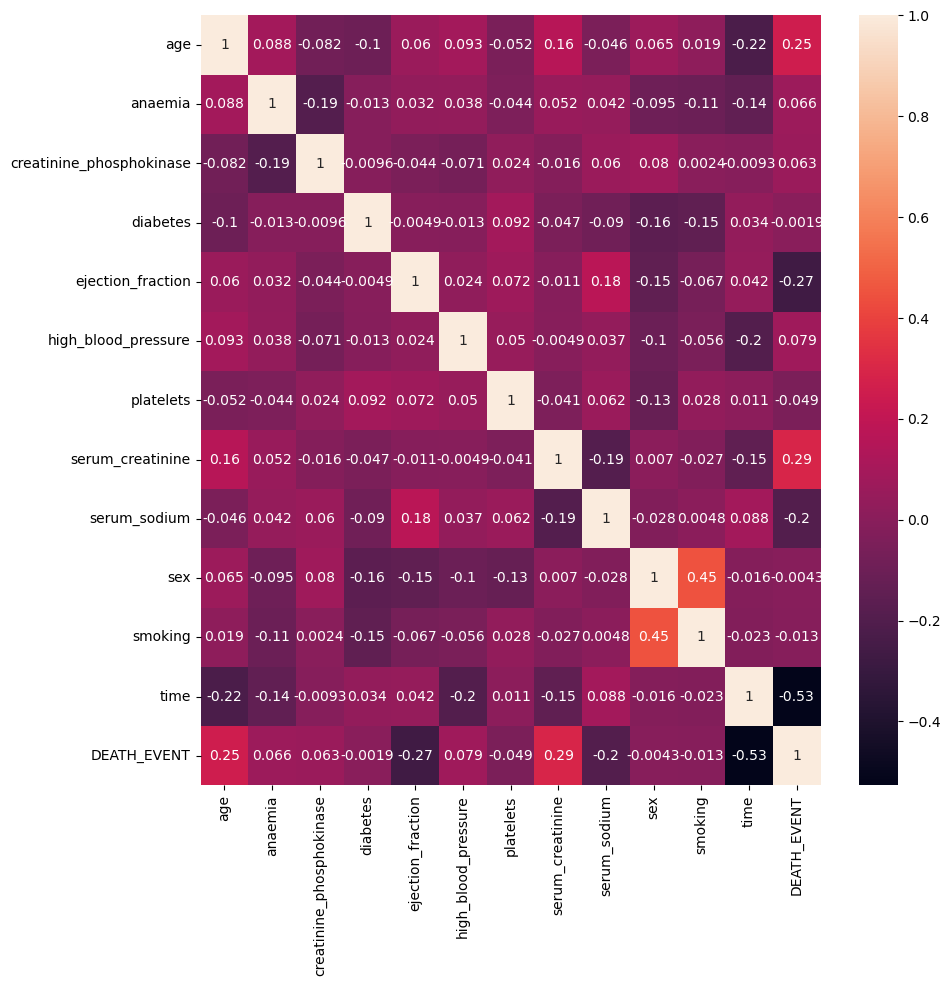

In [220]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [221]:
for column_name, column_s in df.items():
    print(column_s.value_counts())

age
60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
58.000    10
53.000    10
63.000     8
80.000     7
72.000     7
42.000     7
40.000     7
85.000     6
68.000     5
62.000     5
52.000     5
61.000     4
49.000     4
73.000     4
51.000     4
59.000     4
69.000     3
46.000     3
82.000     3
90.000     3
64.000     3
48.000     2
78.000     2
95.000     2
57.000     2
54.000     2
77.000     2
67.000     2
66.000     2
44.000     2
60.667     2
87.000     1
79.000     1
41.000     1
94.000     1
86.000     1
81.000     1
43.000     1
47.000     1
56.000     1
Name: count, dtype: int64
anaemia
0    170
1    129
Name: count, dtype: int64
creatinine_phosphokinase
582     47
129      4
66       4
47       3
60       3
        ..
190      1
103      1
1820     1
2060     1
2413     1
Name: count, Length: 208, dtype: int64
diabetes
0    174
1    125
Name: count, dtype: int64
ejection_fraction
35    49
38    40
40    37
25    36
30    34
60    

## 학습 데이터 분리

In [222]:
x_data = df.iloc[:, :-1] # DataFrame
y_data = df.iloc[:, -1] # Series
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=11, stratify=y_data)
print(type(x_train), x_train.shape)
print(type(y_train), y_train.shape)
print(y_train.value_counts())
print(type(x_test), x_test.shape)
print(type(y_test), y_test.shape)
print(y_test.value_counts())
x_data.head()

<class 'pandas.core.frame.DataFrame'> (239, 12)
<class 'pandas.core.series.Series'> (239,)
DEATH_EVENT
0    162
1     77
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'> (60, 12)
<class 'pandas.core.series.Series'> (60,)
DEATH_EVENT
0    41
1    19
Name: count, dtype: int64


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


## 학습 알고리즘 검토

In [ ]:
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()
svm = SVC()
sgd = SGDClassifier()
knn = KNeighborsClassifier()
estimator_list = [dt_clf, rf_clf, lr_clf, svm, sgd, knn]

In [224]:
for estimator in estimator_list:
    exec_estimator(estimator, x_train, y_train, x_test, y_test)

<class 'sklearn.tree._classes.DecisionTreeClassifier'> accuracy: 0.7833
<class 'sklearn.ensemble._forest.RandomForestClassifier'> accuracy: 0.9167
<class 'sklearn.linear_model._logistic.LogisticRegression'> accuracy: 0.8833
<class 'sklearn.svm._classes.SVC'> accuracy: 0.6833
<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'> accuracy: 0.3167
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> accuracy: 0.6000


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### cross_val_score

In [225]:
for estimator in estimator_list:
    exec_cross_val_score(estimator, x_train, y_train)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
교차 검증별 정확도 :  [0.6875 0.7708 0.75   0.8542 0.7021]
평균 검증 정확도 :  0.7529255319148935
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
교차 검증별 정확도 :  [0.8333 0.7708 0.6875 0.8958 0.8511]
평균 검증 정확도 :  0.8077127659574469
<class 'sklearn.linear_model._logistic.LogisticRegression'>
교차 검증별 정확도 :  [0.8542 0.7708 0.7708 0.8333 0.8085]
평균 검증 정확도 :  0.8075354609929078
<class 'sklearn.svm._classes.SVC'>
교차 검증별 정확도 :  [0.6667 0.6667 0.6875 0.6875 0.6809]
평균 검증 정확도 :  0.677836879432624
<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>
교차 검증별 정확도 :  [0.6667 0.6667 0.3125 0.6875 0.6809]
평균 검증 정확도 :  0.6028368794326241
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
교차 검증별 정확도 :  [0.6042 0.5625 0.625  0.6042 0.5319]
평균 검증 정확도 :  0.5855496453900708


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

### KFold

In [226]:
for estimator in estimator_list:
    exec_kfold(estimator, x_data, y_data, 5)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
#0. 교차 검증 정확도: 0.5333
#1. 교차 검증 정확도: 0.6333
#2. 교차 검증 정확도: 0.8167
#3. 교차 검증 정확도: 0.7500
#4. 교차 검증 정확도: 0.8644
평균 정확도: 0.7195
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
#0. 교차 검증 정확도: 0.6000
#1. 교차 검증 정확도: 0.8167
#2. 교차 검증 정확도: 0.8833
#3. 교차 검증 정확도: 0.8000
#4. 교차 검증 정확도: 0.9492
평균 정확도: 0.8098
<class 'sklearn.linear_model._logistic.LogisticRegression'>
#0. 교차 검증 정확도: 0.5833
#1. 교차 검증 정확도: 0.7000
#2. 교차 검증 정확도: 0.8667
#3. 교차 검증 정확도: 0.7833
#4. 교차 검증 정확도: 0.9492
평균 정확도: 0.7765
<class 'sklearn.svm._classes.SVC'>
#0. 교차 검증 정확도: 0.1333
#1. 교차 검증 정확도: 0.7000
#2. 교차 검증 정확도: 0.8333
#3. 교차 검증 정확도: 0.7833
#4. 교차 검증 정확도: 0.9492
평균 정확도: 0.6798
<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>
#0. 교차 검증 정확도: 0.1333
#1. 교차 검증 정확도: 0.3000
#2. 교차 검증 정확도: 0.1667
#3. 교차 검증 정확도: 0.7833
#4. 교차 검증 정확도: 0.0508
평균 정확도: 0.2868
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
#0. 교차 검증 정확도: 0.1833
#1. 교차 검증 정확도:

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

### Stratified KFold

In [227]:
for estimator in estimator_list:
    exec_stratified_kfold(estimator, x_data, y_data, 5)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
#0. 교차 검증 정확도: 0.3667
#1. 교차 검증 정확도: 0.8833
#2. 교차 검증 정확도: 0.7000
#3. 교차 검증 정확도: 0.5667
#4. 교차 검증 정확도: 0.6610
평균 정확도: 0.6355
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
#0. 교차 검증 정확도: 0.4333
#1. 교차 검증 정확도: 0.8333
#2. 교차 검증 정확도: 0.8333
#3. 교차 검증 정확도: 0.6833
#4. 교차 검증 정확도: 0.6780
평균 정확도: 0.6923
<class 'sklearn.linear_model._logistic.LogisticRegression'>
#0. 교차 검증 정확도: 0.5667
#1. 교차 검증 정확도: 0.9000
#2. 교차 검증 정확도: 0.9000
#3. 교차 검증 정확도: 0.8667
#4. 교차 검증 정확도: 0.6780
평균 정확도: 0.7823
<class 'sklearn.svm._classes.SVC'>
#0. 교차 검증 정확도: 0.6667
#1. 교차 검증 정확도: 0.6833
#2. 교차 검증 정확도: 0.6833
#3. 교차 검증 정확도: 0.6833
#4. 교차 검증 정확도: 0.6780
평균 정확도: 0.6789
<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>
#0. 교차 검증 정확도: 0.6667
#1. 교차 검증 정확도: 0.6833
#2. 교차 검증 정확도: 0.6833
#3. 교차 검증 정확도: 0.6833
#4. 교차 검증 정확도: 0.3220
평균 정확도: 0.6077
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
#0. 교차 검증 정확도: 0.6000
#1. 교차 검증 정확도:

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

## 학습 및 예측 (LogisticRegression)

### 표준화 하지 않는 경우 (accuary: 0.8833, precision: 0.8333, recall: 0.7895, f1: 0.8108, roc_auc: 0.9191)

In [228]:
x_data = df.iloc[:, :-1] # DataFrame
y_data = df.iloc[:, -1] # Series
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=11, stratify=y_data)

lr_clf.fit(x_train, y_train)
y_pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)
show_clf_eval(y_test, y_pred, pred_proba[:,1])

# 오차행렬
[[38  3]
 [ 4 15]]
accuary: 0.8833, precision: 0.8333, recall: 0.7895, f1: 0.8108, roc_auc: 0.9191


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 표준화 수행한 경우 (accuary: 0.8833, precision: 0.8750, recall: 0.7368, f1: 0.8000, roc_auc: 0.9409)

In [229]:
x_data = df.iloc[:, :-1] # DataFrame
y_data = df.iloc[:, -1] # Series
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_data)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_data, test_size=0.2, random_state=11, stratify=y_data)

lr_clf.fit(x_train, y_train)
y_pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)
show_clf_eval(y_test, y_pred, pred_proba[:,1])
print(y_test.shape)

# 오차행렬
[[39  2]
 [ 5 14]]
accuary: 0.8833, precision: 0.8750, recall: 0.7368, f1: 0.8000, roc_auc: 0.9409
(60,)


### 하이퍼 파라미터 최적화 (Accuracy :  0.8833)

In [235]:
exec_grid_search_logistic_regression(x_train, y_train, x_test, y_test, 5)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
Best Parameter :  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score :  0.815868794326241
Accuracy :  0.8833333333333333


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
260 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver =

<class 'pandas.core.series.Series'> (60,) 224    0
157    0
114    0
156    0
88     0
54     1
76     0
172    0
32     1
279    0
176    0
221    0
9      1
149    0
196    0
40     1
82     1
169    0
150    1
215    0
24     1
231    0
152    0
27     1
155    0
5      1
158    0
93     1
194    1
233    0
281    0
272    0
267    0
198    0
100    0
31     1
22     1
287    0
145    0
44     1
254    0
51     1
203    0
0      1
255    0
68     1
37     1
143    0
238    0
294    0
269    0
139    0
171    0
295    0
247    0
245    0
89     0
103    0
165    1
249    0
Name: DEATH_EVENT, dtype: int64
<class 'numpy.ndarray'> (60,) [0.10597902 0.31533187 0.44978519 0.27904498 0.13297741 0.73782265
 0.09672389 0.02862476 0.65471639 0.02800246 0.24639848 0.01993119
 0.99832264 0.36919736 0.05570992 0.91800348 0.84353616 0.29134275
 0.42986771 0.17603197 0.89700932 0.11046556 0.0972208  0.50765429
 0.4735618  0.91152105 0.34002101 0.70807955 0.26156972 0.05777547
 0.10820412 0.0640240

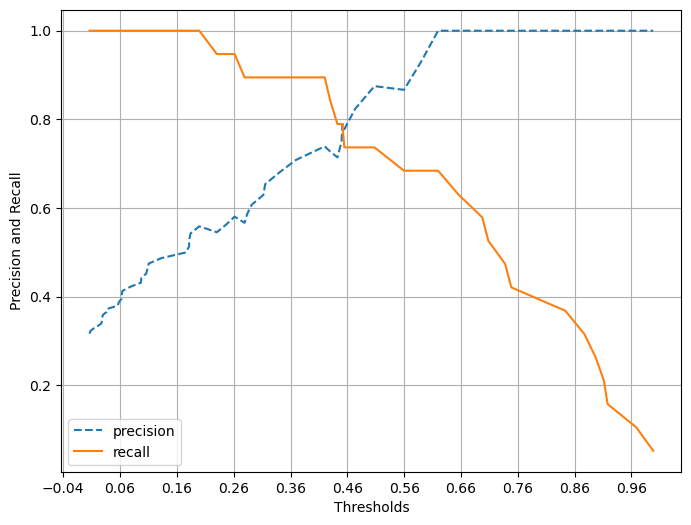

In [231]:
precision_recall_curve_plot(y_test, pred_proba[:,1])

## 분류결정 임계값을 변경하면서 성능 측정 (0.35 <= threshold <= 0.55)

In [232]:
thresholds = np.arange(0.35, 0.55, 0.01)
pred_proba = lr_clf.predict_proba(x_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)


threshold =  0.35
# 오차행렬
[[34  7]
 [ 2 17]]
accuary: 0.8500, precision: 0.7083, recall: 0.8947, f1: 0.7907, roc_auc: 0.9409

threshold =  0.36
# 오차행렬
[[34  7]
 [ 2 17]]
accuary: 0.8500, precision: 0.7083, recall: 0.8947, f1: 0.7907, roc_auc: 0.9409

threshold =  0.37
# 오차행렬
[[35  6]
 [ 2 17]]
accuary: 0.8667, precision: 0.7391, recall: 0.8947, f1: 0.8095, roc_auc: 0.9409

threshold =  0.38
# 오차행렬
[[35  6]
 [ 2 17]]
accuary: 0.8667, precision: 0.7391, recall: 0.8947, f1: 0.8095, roc_auc: 0.9409

threshold =  0.39
# 오차행렬
[[35  6]
 [ 2 17]]
accuary: 0.8667, precision: 0.7391, recall: 0.8947, f1: 0.8095, roc_auc: 0.9409

threshold =  0.4
# 오차행렬
[[35  6]
 [ 2 17]]
accuary: 0.8667, precision: 0.7391, recall: 0.8947, f1: 0.8095, roc_auc: 0.9409

threshold =  0.41000000000000003
# 오차행렬
[[35  6]
 [ 2 17]]
accuary: 0.8667, precision: 0.7391, recall: 0.8947, f1: 0.8095, roc_auc: 0.9409

threshold =  0.42000000000000004
# 오차행렬
[[35  6]
 [ 2 17]]
accuary: 0.8667, precision: 0.7391, recall: 0.8947,

In [ ]:
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), [0.48, 0.49, 0.50])


threshold =  0.48
# 오차행렬
[[39  2]
 [ 5 14]]
accuary: 0.8833, precision: 0.8750, recall: 0.7368, f1: 0.8000, roc_auc: 0.9409

threshold =  0.49
# 오차행렬
[[39  2]
 [ 5 14]]
accuary: 0.8833, precision: 0.8750, recall: 0.7368, f1: 0.8000, roc_auc: 0.9409

threshold =  0.5
# 오차행렬
[[39  2]
 [ 5 14]]
accuary: 0.8833, precision: 0.8750, recall: 0.7368, f1: 0.8000, roc_auc: 0.9409


# END